# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

400

Answer: There are 400 observations, but some of the observations have missing values which will need to be dropped.

#### Question 2. Create a summary table

In [5]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of values for GRE is much larger than GPA, so it would make sense that the STD is larger as well. The equation for standard deviation includes the mean and observation values, so in a variable with high values, this would leader to higher values for the standard deviation. If you were to normalize this and use z-scores, you would not expect the same pattern.

#### Question 4. Drop data points with missing data


In [9]:
df_clean = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: You can now see each variable has the same number of observations.

In [10]:
df_clean.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA

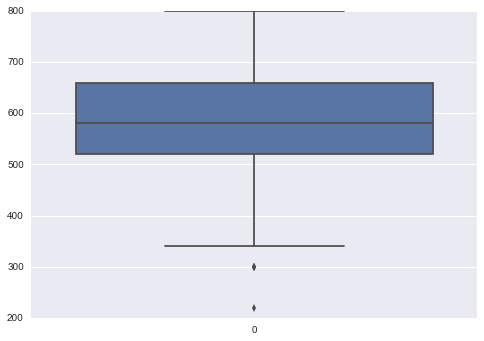

In [12]:
import seaborn as sns
sns.boxplot(data=df_clean['gre'])

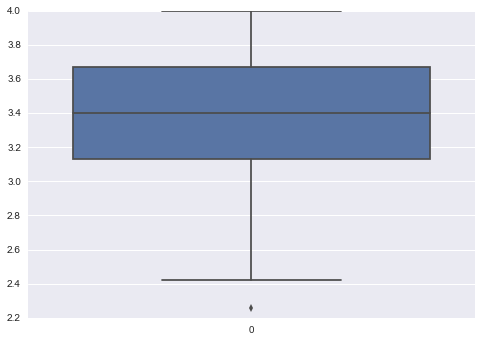

In [13]:
sns.boxplot(data=df_clean['gpa'])

#### Question 7. What do this plots show?

Answer: In general, box plots are good for showing the distribution of a data set, and where a majority of the data points fall. They also show the mins, max's and median values. 

#### Question 8. Describe each distribution 

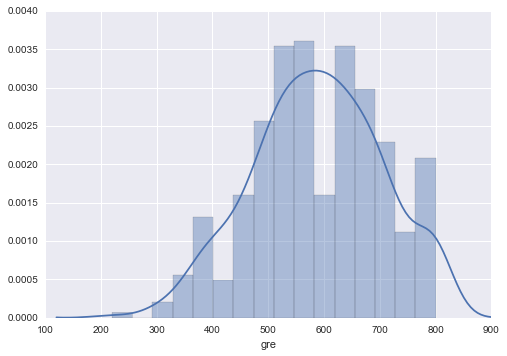

In [18]:
# plot the distribution of each variable 
sns.distplot(df_clean.gre)

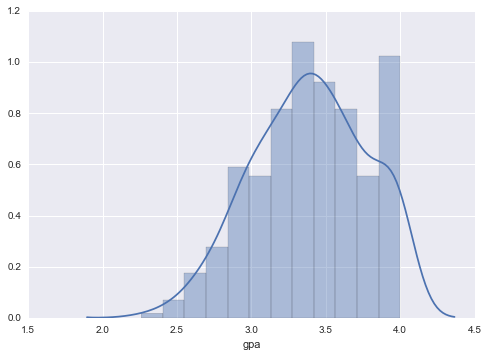

In [19]:
sns.distplot(df_clean.gpa)

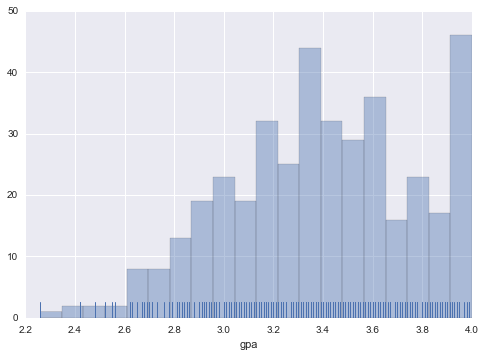

In [30]:
sns.distplot(df_clean.gpa, kde=False, rug=True, bins=20)

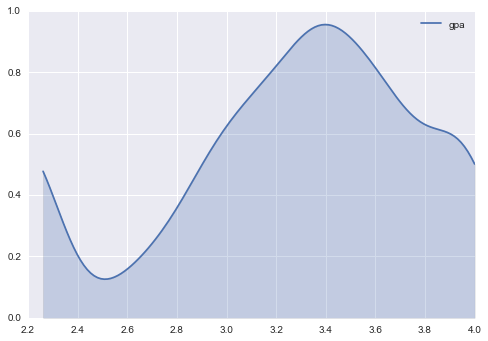

In [36]:
sns.kdeplot(df_clean.gpa, shade=True, cut=0)

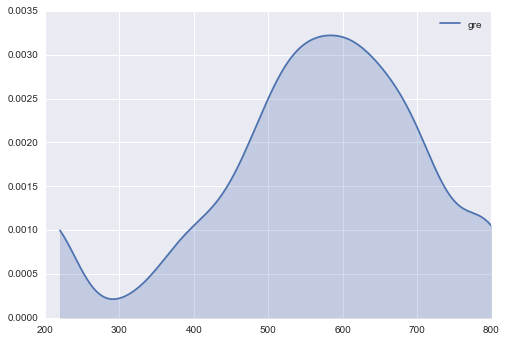

In [37]:
sns.kdeplot(df_clean.gre, shade=True, cut=0)

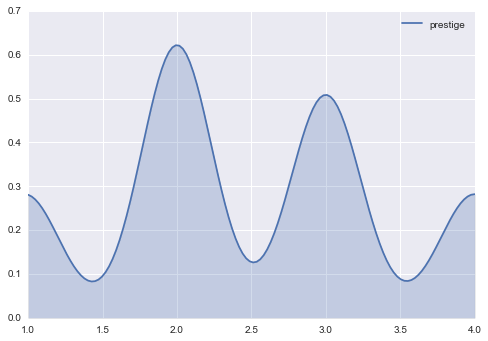

In [38]:
sns.kdeplot(df_clean.prestige, shade=True, cut=0)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: 

In [46]:
stats.mstats.normaltest(df_clean.gpa, axis=0)

# we fail to reject the null that the distribution is normal with high confidence.
# The data follows normal distribution, but has slight skewedness

NormaltestResult(statistic=13.079875560916445, pvalue=0.001444578377229117)

In [52]:
stats.normaltest(df_clean.gre, axis=0)

#This one we actually can reject the null that the disribution is normal. 
# The data looks normal, although this test we were not able to definitely confirm normality. 
## It does, however, look normal with a slight skewedness

NormaltestResult(statistic=3.8179829306094266, pvalue=0.14822980613776662)

In [53]:
stats.normaltest(df_clean.prestige, axis=0)
# Prestige is not normal

NormaltestResult(statistic=49.421253219400995, pvalue=1.8548603556153736e-11)

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No need to correct data based on information given.

#### Question 11. Which of our variables are potentially colinear? 

In [55]:
# create a correlation matrix for the data
df_clean.corr()

#From below matrix, none of the variables are colinear. 

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GRE and GPA are correlated, although we typically use a threashold of .4 to establish collinearity. Interestingly, prestige is negatively correlated with admit. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:  1. Ensure i was confident with the data I was using and the categories I had to define prestige. In an ideal world I would gather more data, such as demographics.
2. Exploratory analysis and more vizualizations. 
3. Build a model to explore the relationship and find which model was the best fit.

#### Question 14. What is your hypothesis? 

Answer: The more prestigious undergraduate university an individual attends, the more likely they will be admitted to the graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data